In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파일 불러오기
import pandas as pd

train_features = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/X_FEATURES/합친피처/모두합친피처/final/train_features.csv').set_index('점포코드')
val_test_features = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/X_FEATURES/합친피처/모두합친피처/final/val_test_feature.csv').set_index('점포코드')

In [ ]:
train_features.iloc[:, 7:]

,revisitport,car_regi,f_cnt_grade,f_amt_grade,m_cnt_grade,m_amt_grade,WORK,WK_COUNT,work_e_count,work_l_count,...,upperclass,lowclass,purtime,midclass,AVG_PUR,STORE_CNT,SUM,RATE,AGE_REGION_RATE,Y
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,-0.003007,63801,0,0,-1,0,0.0,-1.0,0.0,-11.0,...,0.0,0.0,-1,0.0,0,0,0,12,1,1
A12,0.020648,195473,0,0,0,0,1.0,-1.0,2.0,-10.0,...,0.0,0.0,3,46.0,0,0,0,14,1,0
A2,0.015171,177518,0,0,0,0,1.0,-2.0,1.0,-10.0,...,0.0,1003.0,1,0.0,1,0,0,13,1,0
A20,0.027951,124704,0,0,0,0,1.0,-1.0,1.0,-10.0,...,0.0,0.0,0,13.0,0,0,0,13,1,0
A24,-0.030836,57200,0,0,-1,0,0.0,-1.0,0.0,-10.0,...,0.0,0.0,1,0.0,1,0,0,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,-0.055000,57200,1,0,2,2,0.0,0.0,0.0,-14.0,...,0.0,-511.0,4,0.0,1,1,1,18,10,0
D5,-0.131514,195473,-2,0,1,1,-1.0,0.0,0.0,-11.0,...,-13.0,-511.0,0,33.0,1,0,0,14,3,0
D6,0.009888,57200,-1,0,0,0,2.0,0.0,0.0,-14.0,...,13.0,-1758.0,0,0.0,1,0,0,13,2,0


# Pycaret을 사용하여 모델 선정하기
- https://velog.io/@ezoo0422/Python-pycaret%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC-%EB%AA%A8%EB%8D%B8-%EC%84%A0%EC%A0%95%ED%95%98%EA%B8%B0

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75

In [ ]:
### pycaret 설치
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [ ]:
import numpy as np

np.__version__

'1.21.6'

In [ ]:
### 데이터 설정
from pycaret.classification import *

exp_clf = setup(data = train_features, target = 'Y', session_id = 111)

,Description,Value
0,session_id,111
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(163, 31)"
5,Missing Values,True
6,Numeric Features,12
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
### 모델비교
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7288,0.8075,0.8714,0.7429,0.7982,0.3809,0.3988,0.195
et,Extra Trees Classifier,0.7205,0.7971,0.8571,0.7412,0.7913,0.3688,0.3742,0.160
lightgbm,Light Gradient Boosting Machine,0.6864,0.7064,0.8000,0.7237,0.7521,0.3120,0.3367,0.101
ada,Ada Boost Classifier,0.6758,0.7086,0.7571,0.7295,0.7387,0.2963,0.3107,0.093
lr,Logistic Regression,0.6606,0.5864,0.8714,0.6838,0.7582,0.1943,0.1968,0.334
gbc,Gradient Boosting Classifier,0.6477,0.6750,0.7429,0.7033,0.7178,0.2330,0.2323,0.099
lda,Linear Discriminant Analysis,0.6295,0.6218,0.6571,0.7380,0.6792,0.2352,0.2479,0.021
dt,Decision Tree Classifier,0.6288,0.6054,0.6857,0.7190,0.6931,0.2086,0.2188,0.015
dummy,Dummy Classifier,0.6152,0.5000,1.0000,0.6152,0.7614,0.0000,0.0000,0.010
nb,Naive Bayes,0.5902,0.6421,0.8143,0.6111,0.6897,0.0266,0.0041,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=111, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# 테스트 돌리기

In [ ]:
## 정확성 높은 모델 5개 뽑기
top5 = compare_models(sort='Accuracy', n_select=5)
top5

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7288,0.8075,0.8714,0.7429,0.7982,0.3809,0.3988,0.351
et,Extra Trees Classifier,0.7205,0.7971,0.8571,0.7412,0.7913,0.3688,0.3742,0.168
lightgbm,Light Gradient Boosting Machine,0.6864,0.7064,0.8000,0.7237,0.7521,0.3120,0.3367,0.030
ada,Ada Boost Classifier,0.6758,0.7086,0.7571,0.7295,0.7387,0.2963,0.3107,0.176
lr,Logistic Regression,0.6606,0.5864,0.8714,0.6838,0.7582,0.1943,0.1968,0.058
gbc,Gradient Boosting Classifier,0.6477,0.6750,0.7429,0.7033,0.7178,0.2330,0.2323,0.180
lda,Linear Discriminant Analysis,0.6295,0.6218,0.6571,0.7380,0.6792,0.2352,0.2479,0.021
dt,Decision Tree Classifier,0.6288,0.6054,0.6857,0.7190,0.6931,0.2086,0.2188,0.026
dummy,Dummy Classifier,0.6152,0.5000,1.0000,0.6152,0.7614,0.0000,0.0000,0.009
nb,Naive Bayes,0.5902,0.6421,0.8143,0.6111,0.6897,0.0266,0.0041,0.018


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=111, verbose=0,
                       warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=111, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                  

### Top1

In [ ]:
## final model로 돌리기
final_model = finalize_model(top5[0])
prediction = predict_model(final_model, data=val_test_features)
prediction

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=111, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_imp

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.589,0.6959,0.875,0.5512,0.6763,0.1863,0.2269


,age_sales,cust_strscount,vip_strscount,sml_salespct,lge_salespct,sml_custport,lge_custport,revisitport,car_regi,f_cnt_grade,...,purtime,midclass,AVG_PUR,STORE_CNT,SUM,RATE,AGE_REGION_RATE,Y,Label,Score
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.584739,-0.043809,-0.084397,0.009913,0.004024,0.015653,0.000022,0.000605,66439,0,...,-3,0.0,0,0,0,17,9,1,1,0.57
A12,4.642780,-0.119837,-0.017748,-0.028921,0.014959,0.014230,0.000031,0.028741,198611,0,...,2,0.0,0,0,0,17,10,1,0,0.51
A2,4.739787,-0.062124,0.089577,-0.007048,0.003483,0.021488,-0.000009,-0.002871,180551,0,...,1,0.0,0,0,0,17,10,1,1,0.59
A20,5.101637,-0.016137,0.289572,-0.009125,-0.005473,0.016076,-0.000027,-0.003729,126393,0,...,2,0.0,0,0,1,17,10,1,0,0.50
A24,5.089739,0.078166,0.001890,-0.039500,0.092572,0.011837,0.000662,-0.008051,58573,0,...,-4,-13.0,-1,0,0,17,10,1,0,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.370927,-0.305556,-0.750000,0.047620,0.027395,0.002506,0.004275,0.083333,58573,0,...,-1,0.0,1,0,1,18,9,0,0,0.66
D5,4.596728,-0.941667,-1.333333,0.205117,-0.156905,0.017007,-0.012875,-0.200000,198611,-1,...,0,0.0,1,0,1,19,8,0,0,0.75
D6,2.480843,-0.728947,-1.450000,-0.004027,0.004027,0.000342,-0.000342,-0.077632,58573,-1,...,0,0.0,0,0,0,17,2,1,1,0.78


### Top2

In [ ]:
## final model로 돌리기
final_model = finalize_model(top5[1])
prediction = predict_model(final_model, data=val_test_features)
prediction

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=111, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, mi

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6626,0.7288,0.775,0.6263,0.6927,0.3278,0.337


,age_sales,cust_strscount,vip_strscount,sml_salespct,lge_salespct,sml_custport,lge_custport,revisitport,car_regi,f_cnt_grade,...,purtime,midclass,AVG_PUR,STORE_CNT,SUM,RATE,AGE_REGION_RATE,Y,Label,Score
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.584739,-0.043809,-0.084397,0.009913,0.004024,0.015653,0.000022,0.000605,66439,0,...,-3,0.0,0,0,0,17,9,1,0,0.65
A12,4.642780,-0.119837,-0.017748,-0.028921,0.014959,0.014230,0.000031,0.028741,198611,0,...,2,0.0,0,0,0,17,10,1,0,0.53
A2,4.739787,-0.062124,0.089577,-0.007048,0.003483,0.021488,-0.000009,-0.002871,180551,0,...,1,0.0,0,0,0,17,10,1,1,0.54
A20,5.101637,-0.016137,0.289572,-0.009125,-0.005473,0.016076,-0.000027,-0.003729,126393,0,...,2,0.0,0,0,1,17,10,1,0,0.59
A24,5.089739,0.078166,0.001890,-0.039500,0.092572,0.011837,0.000662,-0.008051,58573,0,...,-4,-13.0,-1,0,0,17,10,1,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.370927,-0.305556,-0.750000,0.047620,0.027395,0.002506,0.004275,0.083333,58573,0,...,-1,0.0,1,0,1,18,9,0,0,0.77
D5,4.596728,-0.941667,-1.333333,0.205117,-0.156905,0.017007,-0.012875,-0.200000,198611,-1,...,0,0.0,1,0,1,19,8,0,0,0.72
D6,2.480843,-0.728947,-1.450000,-0.004027,0.004027,0.000342,-0.000342,-0.077632,58573,-1,...,0,0.0,0,0,0,17,2,1,1,0.54


### Top3

In [ ]:
## final model로 돌리기
final_model = finalize_model(top5[2])
prediction = predict_model(final_model, data=val_test_features)
prediction

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               rando

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6258,0.7203,0.7625,0.5922,0.6667,0.2552,0.2658


,age_sales,cust_strscount,vip_strscount,sml_salespct,lge_salespct,sml_custport,lge_custport,revisitport,car_regi,f_cnt_grade,...,purtime,midclass,AVG_PUR,STORE_CNT,SUM,RATE,AGE_REGION_RATE,Y,Label,Score
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.584739,-0.043809,-0.084397,0.009913,0.004024,0.015653,0.000022,0.000605,66439,0,...,-3,0.0,0,0,0,17,9,1,0,0.6888
A12,4.642780,-0.119837,-0.017748,-0.028921,0.014959,0.014230,0.000031,0.028741,198611,0,...,2,0.0,0,0,0,17,10,1,0,0.8124
A2,4.739787,-0.062124,0.089577,-0.007048,0.003483,0.021488,-0.000009,-0.002871,180551,0,...,1,0.0,0,0,0,17,10,1,0,0.5849
A20,5.101637,-0.016137,0.289572,-0.009125,-0.005473,0.016076,-0.000027,-0.003729,126393,0,...,2,0.0,0,0,1,17,10,1,0,0.8702
A24,5.089739,0.078166,0.001890,-0.039500,0.092572,0.011837,0.000662,-0.008051,58573,0,...,-4,-13.0,-1,0,0,17,10,1,0,0.7902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.370927,-0.305556,-0.750000,0.047620,0.027395,0.002506,0.004275,0.083333,58573,0,...,-1,0.0,1,0,1,18,9,0,0,0.9379
D5,4.596728,-0.941667,-1.333333,0.205117,-0.156905,0.017007,-0.012875,-0.200000,198611,-1,...,0,0.0,1,0,1,19,8,0,0,0.9300
D6,2.480843,-0.728947,-1.450000,-0.004027,0.004027,0.000342,-0.000342,-0.077632,58573,-1,...,0,0.0,0,0,0,17,2,1,0,0.5140


# 피처중요도
- https://betterdatascience.com/feature-importance-python/

## LogisticRegression

In [ ]:
# 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
train_features.set_index('점포코드', inplace = True)

In [ ]:
train_features = train_features.fillna(0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features.iloc[:, :-1], train_features.iloc[:, -1])
importances = pd.DataFrame(data={
    'Attribute': train_features.iloc[:, :-1].columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances

,Attribute,Importance
23,purtime,0.003821
19,인구증감,0.003552
2,vip_strscount,0.003518
20,제휴사,0.002537
18,LUXURY,0.001286
13,WORK,0.000782
7,revisitport,0.000239
4,lge_salespct,0.000221
14,WK_COUNT,0.000213
8,car_regi,0.000004


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


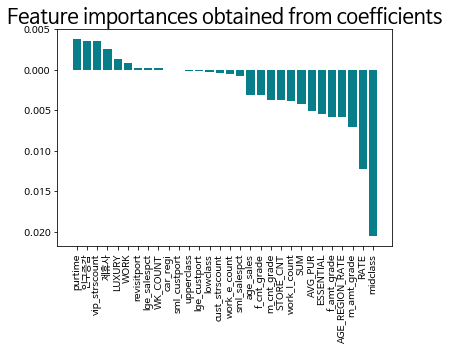

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize'] = (15, 15)
plt.show()

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(train_features.iloc[:, :-1], train_features.iloc[:, -1])
importances = pd.DataFrame(data={
    'Attribute': train_features.iloc[:, :-1].columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances

,Attribute,Importance
28,RATE,0.169683
6,lge_custport,0.068989
5,sml_custport,0.053815
10,f_amt_grade,0.051483
12,m_amt_grade,0.050195
25,AVG_PUR,0.049276
29,AGE_REGION_RATE,0.044276
3,sml_salespct,0.041884
2,vip_strscount,0.037618
18,LUXURY,0.037135


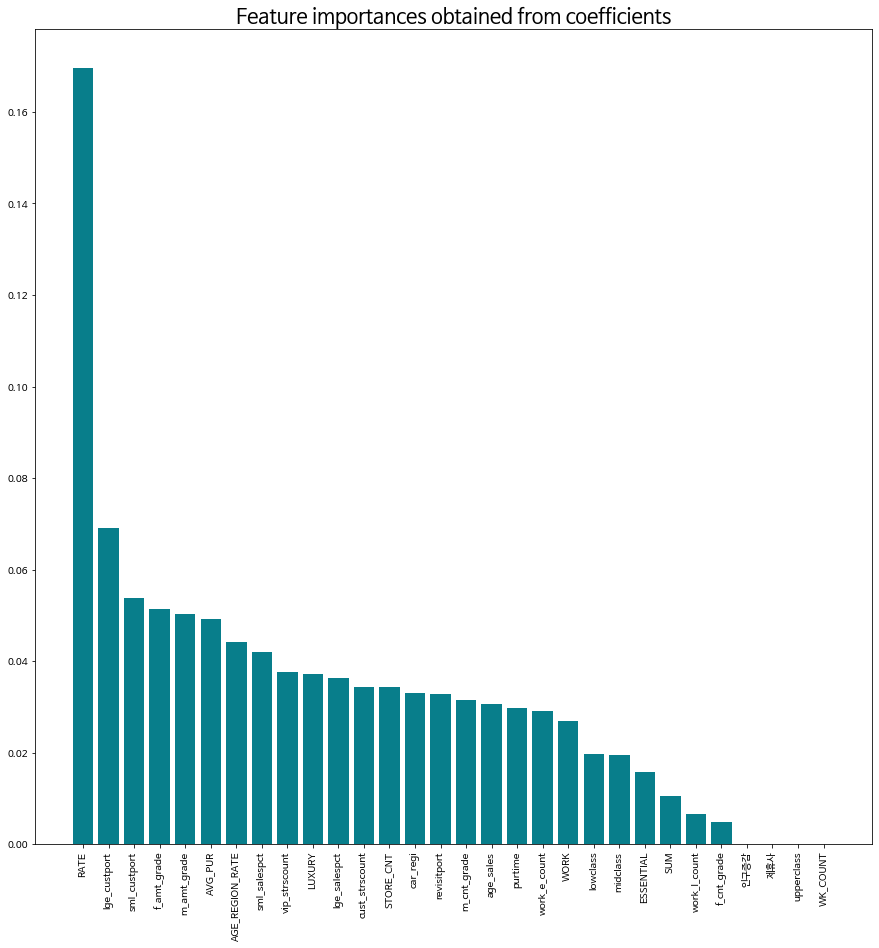

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.rcParams['figure.figsize'] = (20, 20)
plt.xticks(rotation='vertical')
plt.show()

## PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(train_features.iloc[:, :-1])

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(train_features.iloc[:, :-1].columns) + 1)],
    index=train_features.iloc[:, :-1].columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
age_sales,-0.448308,0.304193,0.824757,-0.362697,2.179436,2.415301,1.011484,-0.149445,-0.119396,-0.430215,...,1.710713e-02,-1.885130e-02,4.066187e-03,1.668787e-03,-1.062025e-03,6.469822e-05,7.003216e-05,-1.050423e-04,-9.104710e-05,1.353298e-06
cust_strscount,-0.023502,-0.155353,-0.061633,0.046922,0.086128,-0.107318,0.375284,0.256281,-0.167659,0.220525,...,4.573000e-01,8.187124e-02,-1.271587e-02,1.444422e-02,-1.483921e-03,-4.944362e-03,3.486465e-04,1.577612e-03,-7.707634e-05,-4.745395e-06
vip_strscount,0.002437,-0.049219,0.241099,0.513665,-0.308669,-0.168448,2.447543,0.999405,-0.690365,1.283724,...,-8.590034e-02,-1.508558e-02,-1.390735e-02,-3.515563e-03,7.073006e-03,1.106466e-03,1.944700e-03,-1.390167e-04,3.413445e-05,-2.151949e-06
sml_salespct,-0.005441,-0.020032,-0.003445,-0.050908,0.055245,-0.043028,-0.051023,0.013867,0.057138,0.039450,...,-7.369140e-03,1.084041e-02,-4.764778e-03,3.700312e-03,4.306901e-03,5.193470e-02,5.654121e-02,-4.329836e-02,6.850560e-03,-1.574405e-04
lge_salespct,-0.003169,0.011158,-0.023423,0.018067,-0.011605,-0.020371,0.061770,-0.003461,-0.066441,-0.038990,...,1.690537e-02,-1.859653e-02,2.685851e-02,-3.573659e-03,-1.418191e-02,-7.167895e-02,-5.045240e-02,-3.475847e-02,9.751433e-03,-1.678641e-04
sml_custport,0.000715,-0.000520,-0.000202,-0.000082,0.001427,-0.000825,0.000986,0.000806,0.000105,0.001085,...,3.339661e-04,2.848676e-03,9.447134e-04,-1.270412e-03,-1.172004e-03,-2.563178e-04,-1.377444e-04,-1.764791e-03,5.779456e-04,6.616385e-03
lge_custport,0.002609,0.003966,-0.022936,-0.011466,0.002887,-0.051309,0.013633,0.010106,-0.031042,-0.016296,...,2.119245e-03,-1.224372e-02,1.112793e-02,3.070261e-03,-8.936936e-03,-1.476349e-02,-2.756622e-03,-2.504095e-02,-2.518858e-02,4.491386e-05
revisitport,-0.014343,-0.000148,0.045656,0.039658,-0.037425,0.005054,0.016360,-0.008456,0.018763,0.046776,...,2.519267e-02,4.285721e-03,-1.407580e-02,6.889012e-03,2.297629e-03,8.223525e-02,-8.107604e-02,-7.823449e-03,-4.283713e-04,-1.795237e-05
car_regi,-48593.559268,1.125520,-0.000396,-0.000064,-0.000013,-0.000031,0.000001,-0.000022,-0.000006,0.000012,...,1.978821e-08,5.714079e-07,2.181093e-07,-2.232682e-07,-5.240884e-07,-5.247936e-09,2.062353e-08,8.425115e-09,-1.866569e-09,5.938811e-11
f_cnt_grade,-0.002248,-0.080864,-0.382256,-0.246848,0.039687,-0.758098,0.168022,0.144597,-0.452773,-0.404524,...,9.438657e-02,4.129390e-02,-3.046676e-01,1.419940e-02,3.862014e-02,-5.588149e-04,-4.116626e-04,-2.944195e-04,1.232046e-04,1.097294e-05


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


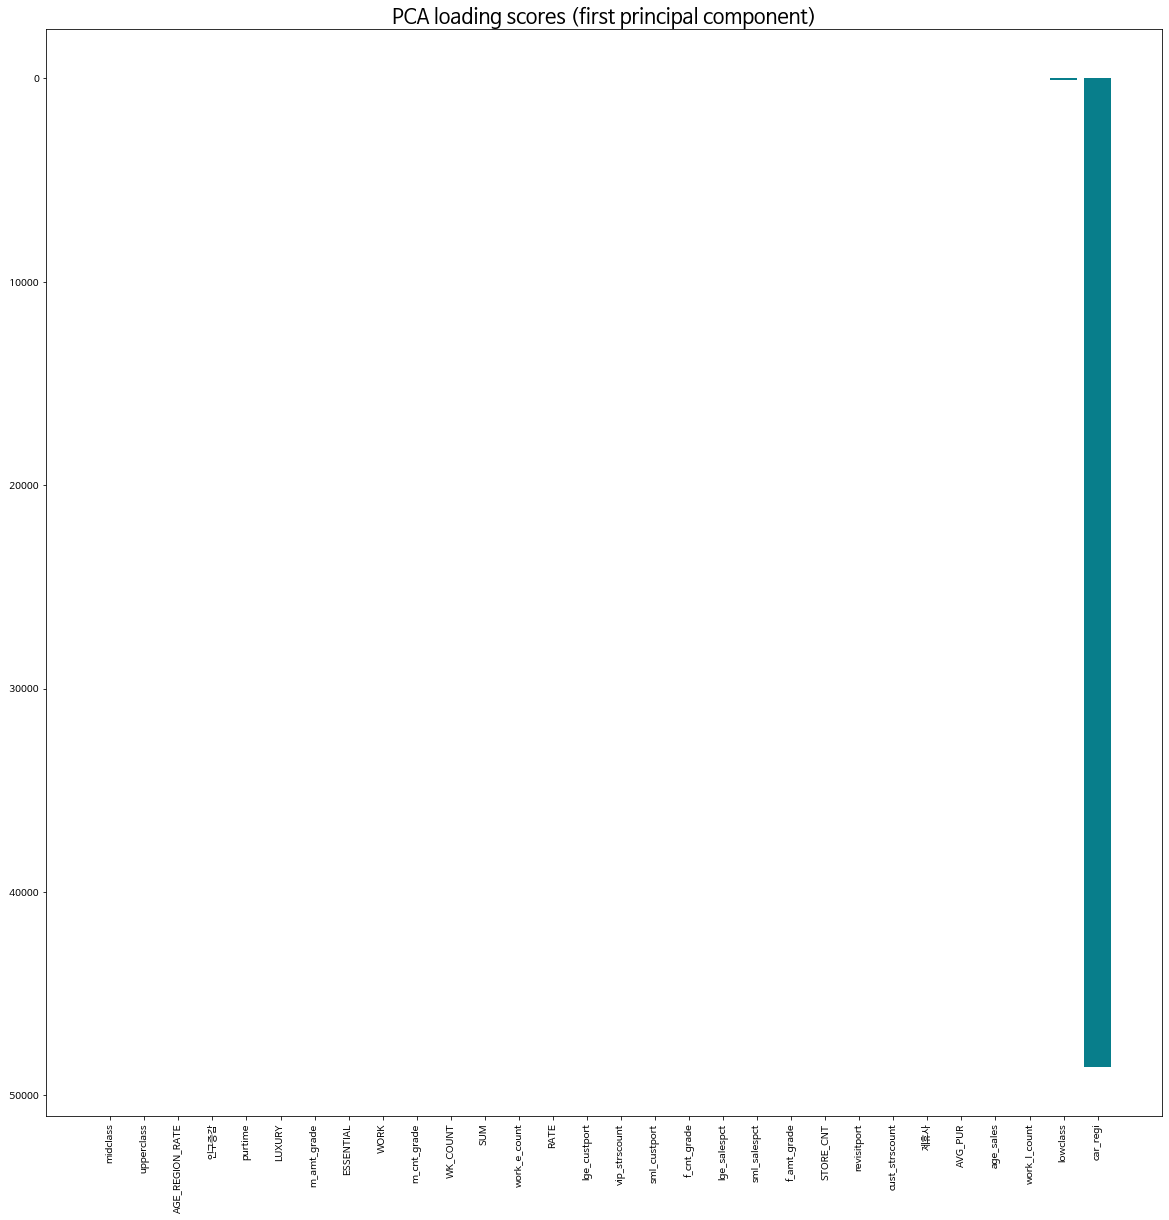

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

## Permutation Importance

permutation importance는 특정 feature를 무작위로 섞어 성능 손실에 얼만큼 영향을 주는지 계산한다. 성능이 크게 안좋아지면 해당 feature는 중요도가 높다고 해석할 수 있다.

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c9c4bd69391519f684d0347884c9dc853348ad14bbbb736f45ae90b5740535d1
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5

perm = PermutationImportance(model, random_state=42).fit(train_features.iloc[:, :-1], train_features.iloc[:, -1])
print(eli5.format_as_text(explain_weights.explain_permutation_importance(perm, feature_names = [x for x in train_features.iloc[:, :-1].columns], top=40)))

explain_weights.explain_permutation_importance(perm, feature_names = [x for x in train_features.iloc[:, :-1].columns], top=47)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.1779 ± 0.0320  RATE
0.0380 ± 0.0180  lge_custport
0.0245 ± 0.0174  m_amt_grade
0.0172 ± 0.0143  f_amt_grade
0.0160 ± 0.0060  STORE_CNT
0.0147 ± 0.0060  AVG_PUR
0.0123 ± 0.0078  WORK
0.0110 ± 0.0049  sml_custport
0.0098 ± 0.0060  lge_salespct
0.0086 ± 0.0098  age_sales
0.0074 ± 0.0049  cust_strscount
0.0061 ± 0.0110  m_cnt_grade
0.0049 ± 0.0092  LUXURY
0.0049 ± 0.0049  work_e_count
0.0025 ± 0.0098  sml_salespct
0.0025 ± 0.0060  vip_strscount
     0 ± 0.0000  revisitport
     0 ± 0.0000  car_regi
     0 ± 0.0000  f_cnt_grade
     0 ± 0.0000  AGE_REGION_RATE
     0 ± 0.0000  work_l_count
     0

Weight,Feature
0.1779 ± 0.0320,RATE
0.0380 ± 0.0180,lge_custport
0.0245 ± 0.0174,m_amt_grade
0.0172 ± 0.0143,f_amt_grade
0.0160 ± 0.0060,STORE_CNT
0.0147 ± 0.0060,AVG_PUR
0.0123 ± 0.0078,WORK
0.0110 ± 0.0049,sml_custport
0.0098 ± 0.0060,lge_salespct
0.0086 ± 0.0098,age_sales


## SHAP

게임이론을 바탕으로 각 feature가 점수에 기여한 정도를 계산한 방식이다. gain, split와 달리 양/음의 영향도를 알 수 있다. (음의 영향이 크다고 나쁜 것이 아니다. 영향이 큰 것이 중요하다)

SHAP 그래프는 자동적으로 맨 위 feature가 중요하다. 중요한 feature 일수록 SHAP value의 범위가 넓다.

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


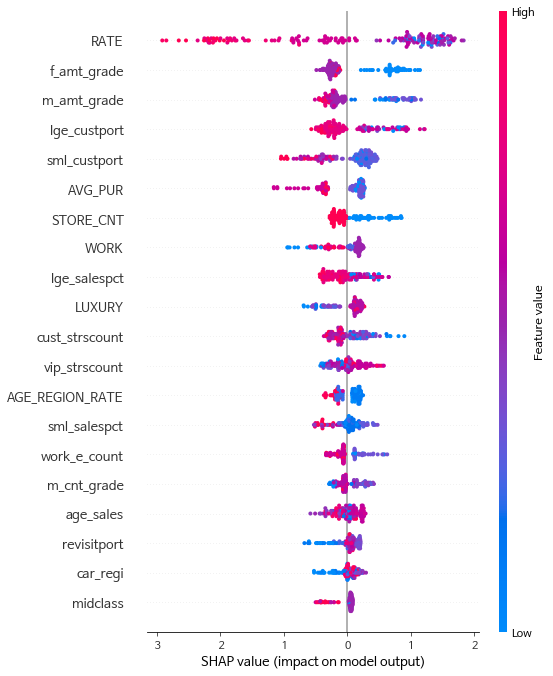

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_features.iloc[:, :-1])
fig = shap.summary_plot(shap_values, train_features.iloc[:, :-1])
plt.savefig('shap.png', dpi=300, bbox_inches="tight")

## Gain, Split

gain, split로 feature importance를 계산할 경우, 어떤 feature가 중요한지는 알 수 있지만, 그 평가 방식이 다르기 때문에 피쳐의 중요도가 다를 수 있다. 대부분 feature의 일관성이 유지되기 때문에 gain, split 모두 중요도 점수가 떨어진다면 제외하는 것을 고려할 수 있다.
같은 방식으로 gain, split 모두 중요도 점수가 높다면 버리지 않는 것을 고려할 수 있다.
이 feature importance는 점수의 영향이 양의 영향인지, 음의 영향인지 알 수 없다는 단점이 있다.

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.array(train_features.iloc[:, :-1])
y_train = np.array(train_features.iloc[:, -1])
X_test, X_val, y_test, y_val = train_test_split(np.array(val_test_features.iloc[:, :-1]), 
                                                np.array(val_test_features.iloc[:, -1]), 
                                                test_size=0.5, random_state = 156)

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric='logloss', eval_set=[(X_test, y_test), (X_val, y_val)], verbose=True)

[1]	valid_0's binary_logloss: 0.733788	valid_1's binary_logloss: 0.69781
[2]	valid_0's binary_logloss: 0.723887	valid_1's binary_logloss: 0.693677
[3]	valid_0's binary_logloss: 0.715303	valid_1's binary_logloss: 0.690538
[4]	valid_0's binary_logloss: 0.708187	valid_1's binary_logloss: 0.688428
[5]	valid_0's binary_logloss: 0.69405	valid_1's binary_logloss: 0.680363
[6]	valid_0's binary_logloss: 0.689005	valid_1's binary_logloss: 0.68023
[7]	valid_0's binary_logloss: 0.677578	valid_1's binary_logloss: 0.674357
[8]	valid_0's binary_logloss: 0.668758	valid_1's binary_logloss: 0.671182
[9]	valid_0's binary_logloss: 0.665337	valid_1's binary_logloss: 0.671001
[10]	valid_0's binary_logloss: 0.657435	valid_1's binary_logloss: 0.667666
[11]	valid_0's binary_logloss: 0.654819	valid_1's binary_logloss: 0.668429
[12]	valid_0's binary_logloss: 0.647961	valid_1's binary_logloss: 0.666584
[13]	valid_0's binary_logloss: 0.642353	valid_1's binary_logloss: 0.665227
[14]	valid_0's binary_logloss: 0.6408

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval2(y_test, y_pred, pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(confusion)
    print(f'정확도: {accuracy}, \n정밀도: {precision}, \n재현율: {recall} \nf1: {f1} \nAUC: {roc_auc}')

In [ ]:
get_clf_eval2(y_test, preds, pred_proba)

[[44  1]
 [27  9]]
정확도: 0.654320987654321, 
정밀도: 0.9, 
재현율: 0.25 
f1: 0.391304347826087 
AUC: 0.7074074074074075


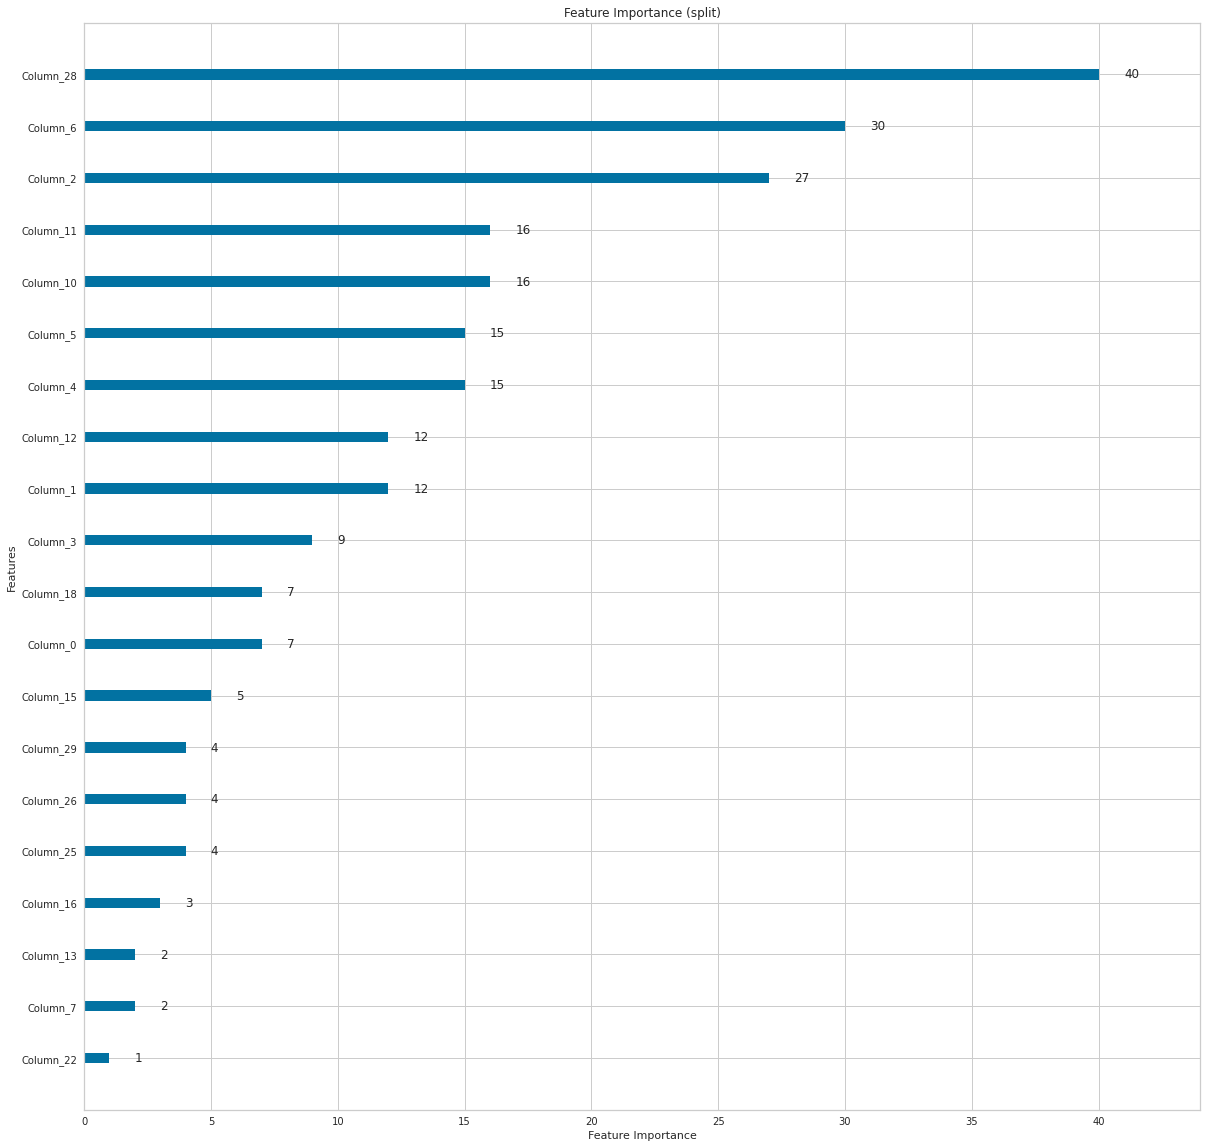

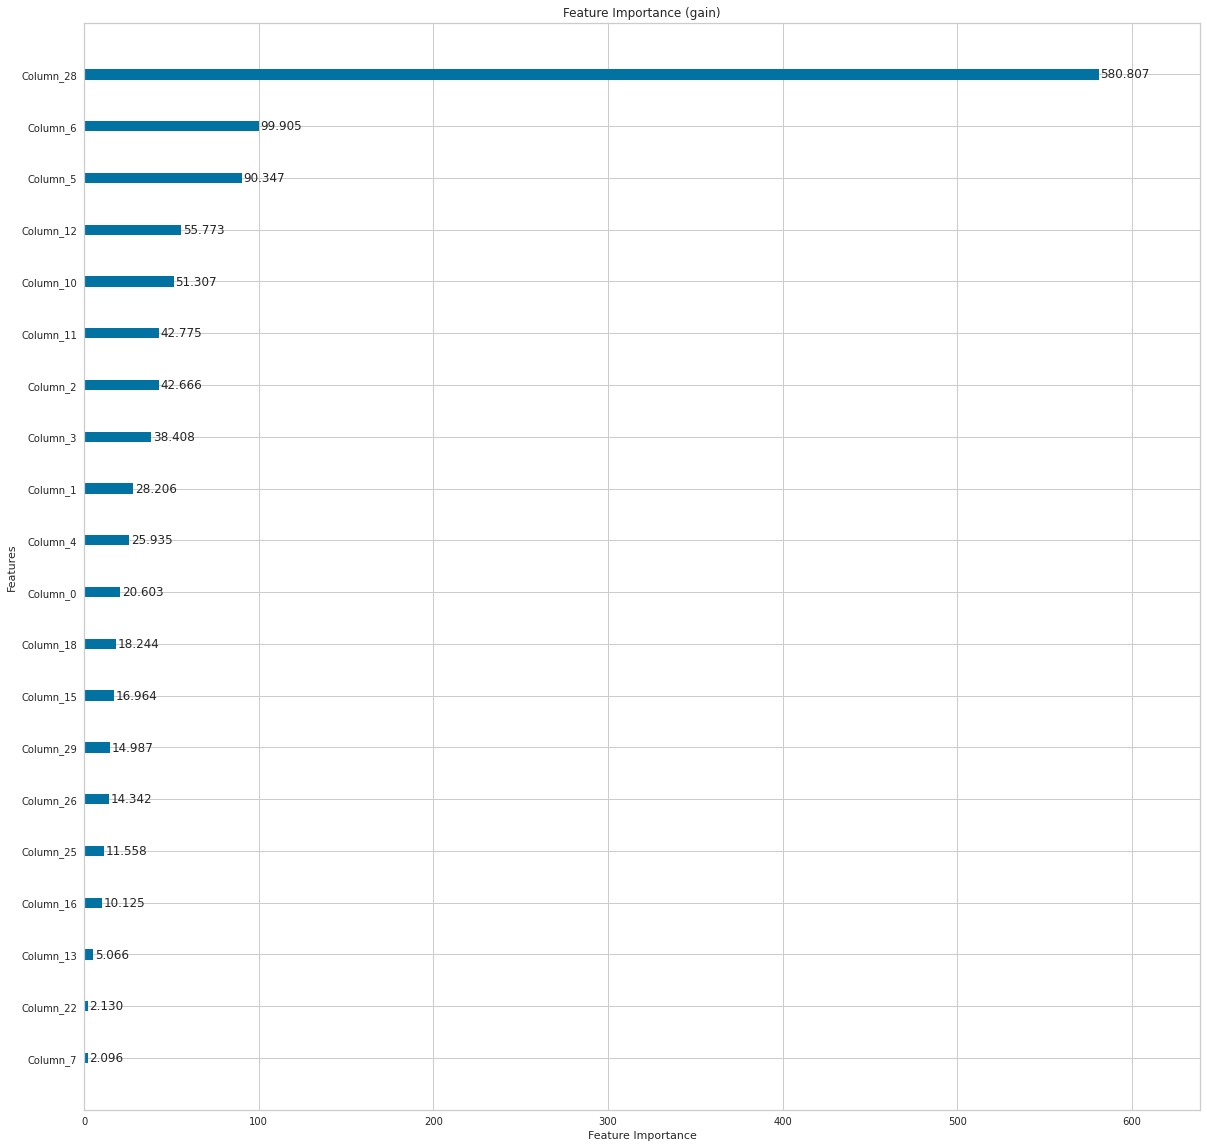

In [ ]:
# model: 이미 학습이 완료된 LGBMModel, or Booster
# FEATURES: model 학습에 사용된 모든 features

# SPLIT
ax = lgb.plot_importance(lgbm_wrapper, max_num_features=len(train_features.iloc[:, :-1].columns), importance_type='split')
ax.set(title=f'Feature Importance (split)',
	xlabel='Feature Importance',
	ylabel='Features')
ax.figure.savefig(f'fi_split.png', dpi=300)


# GAIN
ax = lgb.plot_importance(lgbm_wrapper, max_num_features=len(train_features.iloc[:, :-1].columns), importance_type='gain')
ax.set(title=f'Feature Importance (gain)',
	xlabel='Feature Importance',
	ylabel='Features')
ax.figure.savefig(f'fi_gain.png', dpi=300)